In [ ]:
from zipfile import ZipFile
import sys
import subprocess
import os
import random
from typing import Tuple, Dict, List, Union

try:
  import numpy as np
except:
  print("torch import failed downloading")
  subprocess.run([sys.executable,'-m','pip','install','numpy'])
  import numpy as np
print(f"Numpy version: {np.__version__}")

try:
  import torch
except:
  print("torch import failed downloading")
  subprocess.run([sys.executable,'-m','pip','install','torch'])
  import torch
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

print(f"torch verion:{torch.__version__}")

try:
  import requests
except:
  print("requests import failed downloading")
  subprocess.run([sys.executable,'-m','pip','install','requests'])
  import requests
print (f"requests version {requests.__version__}")

try:
  import zipfile
except:
  print("requests import failed downloading")
  subprocess.run([sys.executable,'-m','pip','install','zipfile'])
  import zipfile

try:
  import pathlib
except:
  print("pathlib import failed downloading")
  subprocess.run([sys.executable,'-m','pip','install','pathlib'])
  import pathlib
from pathlib import Path

try:
  import matplotlib
except:
  print("matplotlib import failed downloading")
  subprocess.run([sys.executable,'-m','pip','install','matplotlib'])
  import matplotlib
import matplotlib.pyplot as plt
print(f"matplotlib verion:{matplotlib.__version__}")

try:
  import torchvision
except:
  print("torchvision import failed downloading")
  subprocess.run([sys.executable,'-m','pip','install','torchvision'])
  import torchvision
print(f"torchvision verion:{torchvision.__version__}")
from torchvision import datasets, transforms

try:
  import torchinfo
except:
  print("torchinfo import failed downloading")
  subprocess.run([sys.executable,'-m','pip','install','torchinfo'])
  import torchinfo
print(f"torchinfo verion:{torchinfo.__version__}")
from torchinfo import summary

try:
  from tqdm.auto import tqdm
except:
  print("tqdm import failed downloading")
  subprocess.run([sys.executable,'-m','pip','install','tqdm'])
  import tqdm

try:
  import timeit
  from timeit import default_timer as timer
except:
  print("timeit import failed downloading")
  subprocess.run([sys.executable,'-m','pip','install','timeit'])
  import timeit
  from timeit import default_timer as timer


try:
  import pandas as pd
except:
  print("pandas import failed downloading")
  subprocess.run([sys.executable,'-m','pip','install','pandas'])
  import pandas as pd
print(f"pandas version {pd.__version__}")

try:
  import PIL
except:
  print("PIL import failed downloading")
  subprocess.run([sys.executable,'-m','pip','install','pillow'])
  import PIL
from PIL import Image
print (f"PIL version {PIL.__version__}")

Numpy version: 2.0.2
torch verion:2.6.0+cu124
requests version 2.32.3
matplotlib verion:3.10.0
torchvision verion:0.21.0+cu124
torchinfo import failed downloading
torchinfo verion:1.8.0
pandas version 2.2.2
PIL version 11.1.0


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"device: {device}")

device: cuda


In [ ]:
data_path = Path("data/")
image_path = data_path/"pizza_steak_sushi"
if image_path.is_dir():
  print(f"{image_path} directory already exists")
else:
  print(f"{image_path} does not exist creating...")
  image_path.mkdir(parents=True, exist_ok=True)

with open(data_path/"pizza_steak_sushi.zip","wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/refs/heads/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak and sushi data.")
  f.write(request.content)

with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip","r") as zip_ref:
  print("unzipping pizza steak and sushi data")
  zip_ref.extractall(path=image_path)

data/pizza_steak_sushi does not exist creating...
unzipping pizza steak and sushi data


In [ ]:
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

In [ ]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'


In [ ]:
train_dir = image_path/"train"
test_dir = image_path/"test"

In [ ]:
#random.seed(42)#I decide to do this a bit lower
image_path_list=list(image_path.glob("*/*/*.jpg"))
#print(image_path_list) # This looks less clean in googlecolab
image_path_list


[PosixPath('data/pizza_steak_sushi/train/sushi/2871052.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/424994.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/1552504.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/1221830.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/307738.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/765684.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/2873571.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/148799.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/1575445.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/3737197.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/1070104.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/3081701.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/2980779.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/2120573.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/2019344.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/1957449.jpg'),
 PosixPath('

data/pizza_steak_sushi/train/sushi/1232045.jpg
sushi
Random image path data/pizza_steak_sushi/train/sushi/1232045.jpg
image class: sushi
image height: 512
image width: 512


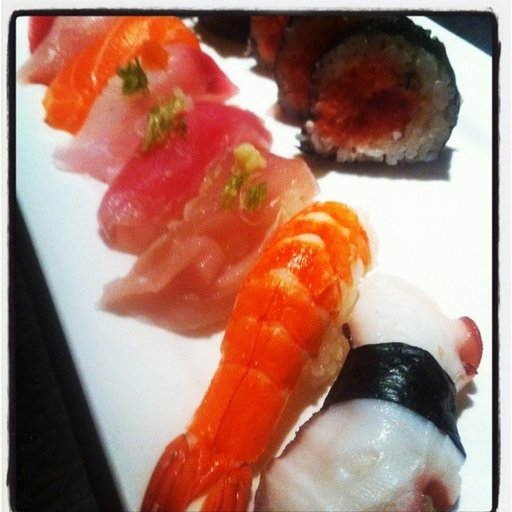

In [ ]:
random.seed(42)
random_image_path = random.choice(image_path_list)
print(random_image_path)
image_class = random_image_path.parent.stem
print(image_class)
img = Image.open(random_image_path)
print(f"Random image path {random_image_path}")
print(f"image class: {image_class}")
print(f"image height: {img.height}")
print(f"image width: {img.width}")
display(img)

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

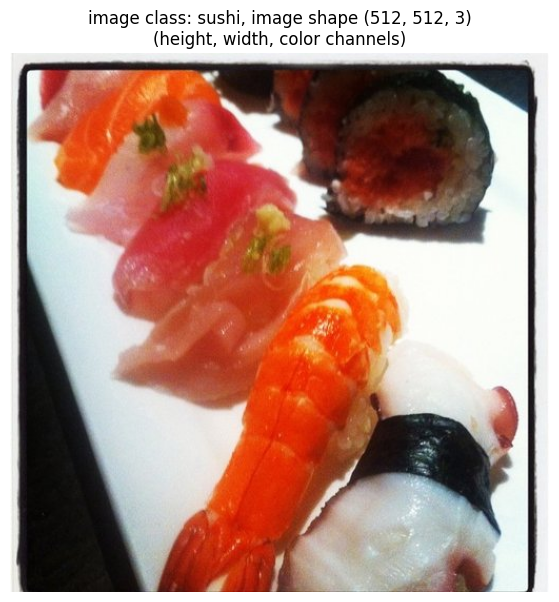

In [ ]:
img_as_array = np.asarray(img)
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"image class: {image_class}, image shape {img_as_array.shape}\n(height, width, color channels)")
plt.axis(False)

In [ ]:
data_transforms = transforms.Compose([
    #resize image to 64x64
    transforms.Resize(size=(64,64)),
    #Flip the images randomly
    transforms.RandomHorizontalFlip(p=0.5),
    #turn the image into a torch tensor
    transforms.ToTensor()
])

In [ ]:
data_transforms(img)

tensor([[[0.9490, 0.9412, 0.9098,  ..., 0.8941, 0.9216, 0.9333],
         [0.9451, 0.8941, 0.5608,  ..., 0.4314, 0.6863, 0.9294],
         [0.9451, 0.7451, 0.1765,  ..., 0.7098, 0.4235, 0.8824],
         ...,
         [0.9451, 0.6157, 0.5333,  ..., 0.0392, 0.2588, 0.8431],
         [0.9490, 0.6745, 0.5451,  ..., 0.0431, 0.2784, 0.8588],
         [0.9490, 0.7490, 0.5412,  ..., 0.0471, 0.3529, 0.8902]],

        [[0.9490, 0.9412, 0.9137,  ..., 0.8980, 0.9216, 0.9333],
         [0.9451, 0.8941, 0.5608,  ..., 0.4275, 0.6745, 0.9294],
         [0.9451, 0.7451, 0.1843,  ..., 0.7255, 0.4196, 0.8824],
         ...,
         [0.9529, 0.6196, 0.5490,  ..., 0.0314, 0.2431, 0.8392],
         [0.9529, 0.6745, 0.5608,  ..., 0.0392, 0.2667, 0.8588],
         [0.9529, 0.7451, 0.5529,  ..., 0.0392, 0.3412, 0.8863]],

        [[0.9490, 0.9412, 0.9137,  ..., 0.8824, 0.9137, 0.9255],
         [0.9490, 0.8941, 0.5569,  ..., 0.4235, 0.6706, 0.9216],
         [0.9529, 0.7490, 0.2000,  ..., 0.7255, 0.4275, 0.

In [ ]:
def plot_transformed_images(image_paths:list,
                            transform,
                            n=3,#number of images
                            seed=None
                            ):
  """
  Using provided image path, loads and transforms the images.
  It then plots the original and the transformed version.
  """
  if (seed):
    random.seed(seed)
  random_image_paths = random.sample(image_paths,k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1,ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"original\nsize:{f.size}")
      ax[0].axis(False)
      transformed_image = transform(f).permute(1,2,0) # will need change later
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nshape:{transformed_image.shape}")
      ax[1].axis(False) #alternatively can be the string "off"
      fig.suptitle(f"class: {image_path.parent.stem}", fontsize=16)

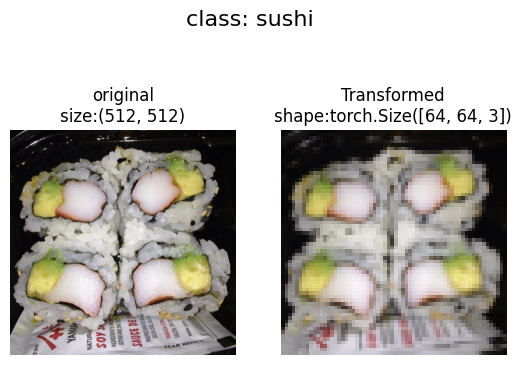

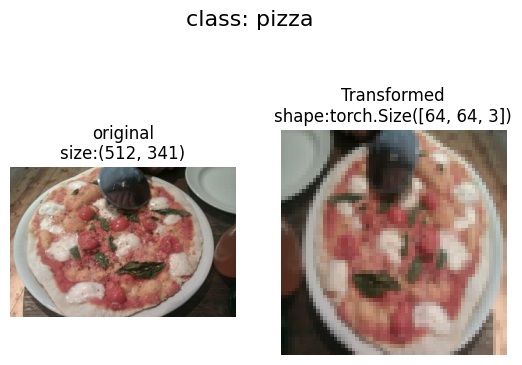

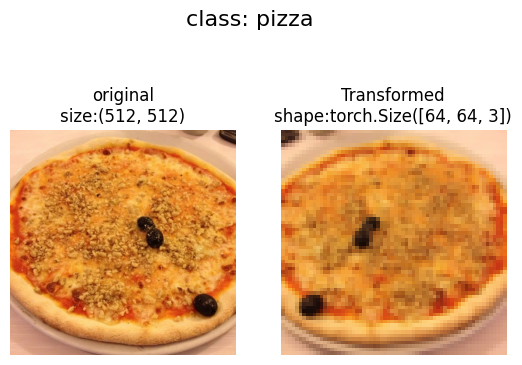

In [ ]:
plot_transformed_images(image_paths=image_path_list,
                        transform=data_transforms,
                        n=3)

In [ ]:
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transforms,#transform for data
                                  target_transform=None#Transform for the label/target
                                  )
test_data = datasets.ImageFolder(root=test_dir, transform=data_transforms)
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
class_names = train_data.classes
print(class_names)

['pizza', 'steak', 'sushi']


In [ ]:
class_dict = train_data.class_to_idx
print(class_dict)

{'pizza': 0, 'steak': 1, 'sushi': 2}


In [ ]:
print(f"train data length: {len(train_data)}, test data length: {len(test_data)}")

train data length: 225, test data length: 75


In [ ]:
img, label = train_data[0][0], train_data[0][1]
print(f"image tensor:\n{img}")
print(f"image shape:{img.shape}")
print(f"image datatype:{img.dtype}")
print(f"label: {class_names[label]}({label})")
print(f"label datatype: {type(label)}")

image tensor:
tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.09

In [ ]:
image_permute = img.permute(1,2,0)
print(f"original shape: {img.shape} -> (color channels, height, width)")
print(f"permuted shape:{image_permute.shape} -> (height, width, color channels)")

original shape: torch.Size([3, 64, 64]) -> (color channels, height, width)
permuted shape:torch.Size([64, 64, 3]) -> (height, width, color channels)


Text(0.5, 1.0, 'pizza')

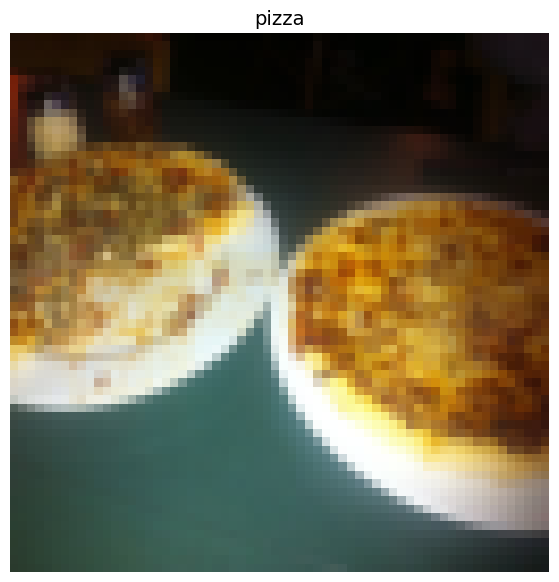

In [ ]:
plt.figure(figsize=(10,7))
plt.imshow(image_permute)
plt.axis("off")
plt.title(class_names[label],fontsize=14)

In [ ]:
BATCH_SIZE = 1
train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE,num_workers=os.cpu_count(), shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE,num_workers=1, shuffle=False)

In [ ]:
print(os.cpu_count())

2


In [ ]:
print(f"{len(train_dataloader)},{len(test_dataloader)}")

225,75


In [ ]:
img, label = next(iter(train_dataloader))
print(f"{img.shape}\nbatch size, color channels, height, width")
print(f"{label.shape}\nbatch size")

torch.Size([1, 3, 64, 64])
batch size, color channels, height, width
torch.Size([1])
batch size


In [ ]:
target_directory = train_dir
print(f"target dir {target_directory}")

target dir data/pizza_steak_sushi/train


In [ ]:
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
print(class_names_found)

['pizza', 'steak', 'sushi']


In [ ]:
def find_classes(directory:str) -> Tuple[List[str],Dict[str,int]]:
  """Finds class names in folder directory."""
  classes = sorted([entry.name for entry in os.scandir(directory) if entry.is_dir()]) # this uses list comprehension
  if not classes:
    raise FileNotFoundError(f"Couldn't find classes in {directory}. Check file structure")
  class_to_idx = {class_name:i for i, class_name in enumerate(classes)} #This uses dictrionary comprehension
  return classes, class_to_idx

In [ ]:
print(find_classes(target_directory))

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})


In [ ]:
class ImageFolderCustom(Dataset):
  def __init__(self,targ_dir:str, transform = None):
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    self.transform = transform
    self.classes, self.class_to_idx = find_classes(targ_dir)

  def load_image(self, index:int) -> Image.Image:
    """opens an image via a path and returns it."""
    image_path = self.paths[index]
    return Image.open(image_path)

  def __len__(self)->int:
    """Returns total number of samples"""
    return len(self.paths)

  def __getitem__(self, index:int)-> Tuple[torch.Tensor,int]:
    """Returns one sample of data and label as a tuple(x,y)"""
    img=self.load_image(index)
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]
    #transform if needed
    if self.transform:
      return self.transform(img), class_idx
    else:
      return img, image_class

In [ ]:
train_transforms = transforms.Compose([transforms.Resize(size=(64,64)),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor()
                                       ])
test_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [ ]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir, transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir, transform=test_transforms)

In [ ]:
print(train_data_custom, test_data_custom)
print(len(train_data), len(train_data_custom))
print(len(test_data), len(test_data_custom))
print(train_data_custom.classes)
print(train_data_custom.classes == train_data.classes)
print(test_data.classes == test_data_custom.classes)

<__main__.ImageFolderCustom object at 0x78b9531aa710> <__main__.ImageFolderCustom object at 0x78b9531b01d0>
225 225
75 75
['pizza', 'steak', 'sushi']
True
True


In [ ]:
def display_random_images(dataset : torch.utils.data.Dataset,
                          classes:List[str]=None,
                          n:int=10, #(n)umber of images
                          display_shape: bool = True,
                          seed:int = None):
  if n>10:
    print("That is too many numbers we are cutting n back to 10, and removing shape display")
    display_shape=False
  n = n if n <= 10 else 10
  if seed:
    random.seed(seed)
  random_samples_idx = random.sample(range(len(dataset)),k=n)
  plt.figure(figsize=(16,8))
  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0],dataset[targ_sample][1]
    targ_image_adjust = targ_image.permute(1,2,0) #[color_channels, height, width] -> [height, width, color_channels]
    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    title=""
    if classes:
      title=f"class:{classes[targ_label]}"
    if display_shape:
      title=title + f"\nshape: {targ_image_adjust.shape}"
    plt.title(title)

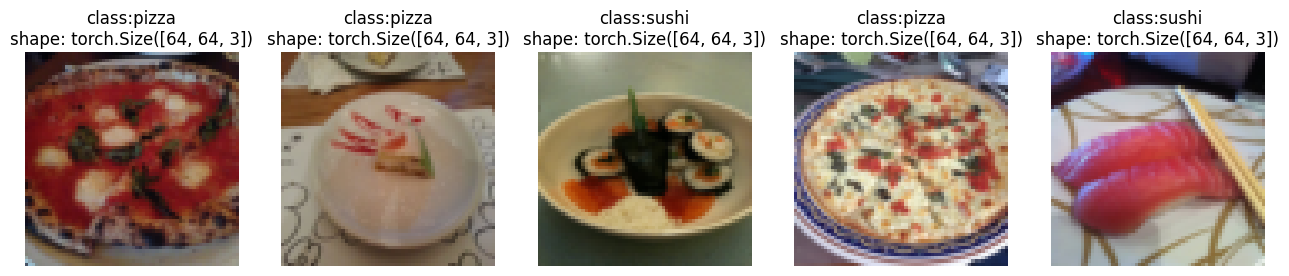

In [ ]:
display_random_images(train_data, n=5,classes=class_names, display_shape=True, seed=None)

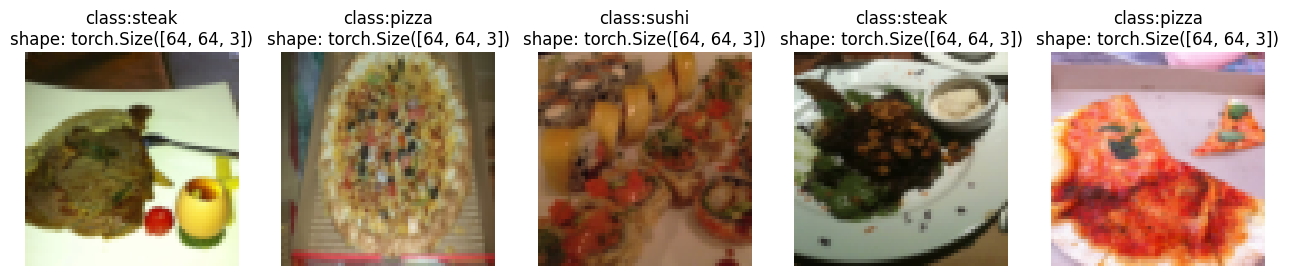

In [ ]:
display_random_images(train_data_custom,
                      n=5,
                      classes=class_names,
                      seed=None)

In [ ]:
print(f"Batch size: {BATCH_SIZE}")
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)
test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False)
print(train_dataloader_custom, test_dataloader_custom)

Batch size: 1
<torch.utils.data.dataloader.DataLoader object at 0x78b937f13310> <torch.utils.data.dataloader.DataLoader object at 0x78b95058fc10>


In [ ]:
img_custom, label_custom = next(iter(train_dataloader_custom))
print(img_custom.shape)
print(label_custom.shape)

torch.Size([32, 3, 64, 64])
torch.Size([32])


In [ ]:
train_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

In [ ]:
image_path_list = list(image_path.glob("*/*/*.jpg"))
print(image_path_list[:10])

[PosixPath('data/pizza_steak_sushi/train/sushi/2871052.jpg'), PosixPath('data/pizza_steak_sushi/train/sushi/424994.jpg'), PosixPath('data/pizza_steak_sushi/train/sushi/1552504.jpg'), PosixPath('data/pizza_steak_sushi/train/sushi/1221830.jpg'), PosixPath('data/pizza_steak_sushi/train/sushi/307738.jpg'), PosixPath('data/pizza_steak_sushi/train/sushi/765684.jpg'), PosixPath('data/pizza_steak_sushi/train/sushi/2873571.jpg'), PosixPath('data/pizza_steak_sushi/train/sushi/148799.jpg'), PosixPath('data/pizza_steak_sushi/train/sushi/1575445.jpg'), PosixPath('data/pizza_steak_sushi/train/sushi/3737197.jpg')]


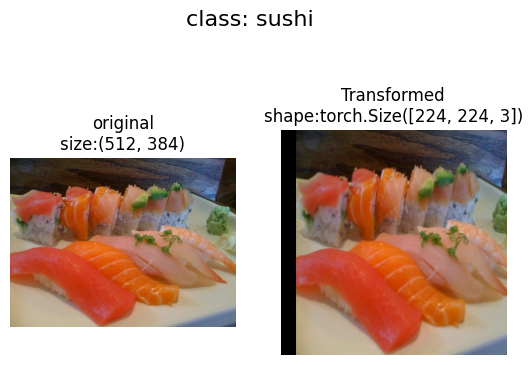

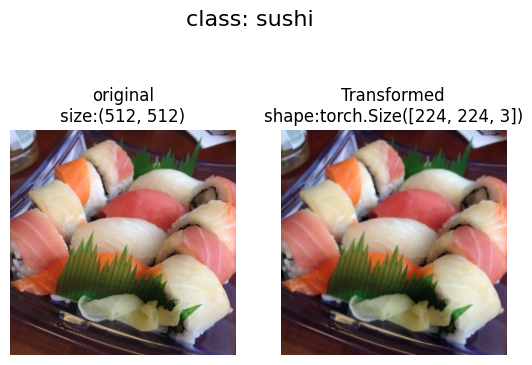

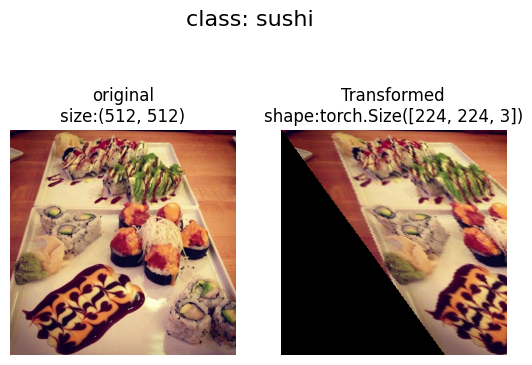

In [ ]:
plot_transformed_images(image_paths=image_path_list,
                        transform=train_transform,
                        n=3,
                        seed=None)

In [ ]:
simple_transform=transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [ ]:
train_data_simple = datasets.ImageFolder(root=train_dir,transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=simple_transform)
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
train_dataloader_simple = DataLoader(dataset=train_data_simple,
                              batch_size=BATCH_SIZE,
                              shuffle=True,
                              num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                             batch_size=BATCH_SIZE,
                             shuffle=False,
                             num_workers=NUM_WORKERS)

In [ ]:
class TinyVGG(nn.Module):
  """Model architecture copying TinyVGG from CNN Explainer
  """
  def __init__(self, input_shape:int, output_shape:int, hidden_units:int):
    super().__init__()
    self.conv_block1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,stride=1, padding=0),
        nn.ReLU(),
                nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,stride=1, padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.conv_block2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,stride=1, padding=0),
        nn.ReLU(),
                nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,stride=1, padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13,#Have to come back to in_features
                  out_features=output_shape)
        )

  def forward(self,x):
    x=self.conv_block1(x)
    x=self.conv_block2(x)
    #print(x.shape)
    x=self.classifier(x)
    #print(x.shape)
    return x


In [ ]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, hidden_units=10, output_shape=len(class_names)).to(device=device)
model_0

TinyVGG(
  (conv_block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [ ]:
image_batch, label_batch = next(iter(train_dataloader_simple))
print(f"image batch shape: {image_batch.shape}, label batch shape: {label_batch.shape}")

image batch shape: torch.Size([32, 3, 64, 64]), label batch shape: torch.Size([32])


In [ ]:
image_batch = image_batch.to(device)
model_0(image_batch)

tensor([[ 2.0795e-02, -1.9510e-03,  9.5212e-03],
        [ 1.8440e-02,  2.4669e-03,  6.6609e-03],
        [ 1.7695e-02,  1.0282e-03,  9.4975e-03],
        [ 2.4446e-02, -3.3489e-03,  9.5877e-03],
        [ 1.9939e-02,  6.9129e-04,  1.0778e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0996e-02,  1.6417e-04,  1.2481e-02],
        [ 2.1566e-02, -1.9607e-03,  9.7175e-03],
        [ 2.4500e-02, -4.7904e-03,  8.5394e-03],
        [ 2.0239e-02, -4.7980e-04,  1.0907e-02],
        [ 2.2219e-02, -4.1815e-04,  9.8173e-03],
        [ 2.2318e-02, -2.1642e-03,  9.4428e-03],
        [ 2.1851e-02, -3.7225e-03,  8.3784e-03],
        [ 2.2881e-02, -1.7559e-03,  1.0299e-02],
        [ 2.1635e-02, -4.3994e-03,  9.4990e-03],
        [ 2.2101e-02, -4.1469e-03,  9.3904e-03],
        [ 2.1226e-02, -4.4215e-03,  1.1476e-02],
        [ 2.1698e-02, -2.7458e-03,  8.4966e-03],
        [ 1.9974e-02, -3.2317e-07,  8.4496e-03],
        [ 1.8308e-02,  1.6378e-03,  8.5491e-03],
        [ 2.0768e-02

In [ ]:
summary(model=model_0,input_size=(1,3,64,64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

In [ ]:
def train_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device="cuda" if torch.cuda.is_available() else "cpu"):
  train_loss, train_acc = 0,0
  model.train()
  for batch, (x,y) in enumerate(data_loader):
    x,y = x.to(device), y.to(device)
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    train_loss+=loss.item()
    #train_acc += accuracy_fn(y, y_pred.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    y_pred_class = torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  return train_loss, train_acc

In [ ]:
def test_step(model:torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              device="cuda" if torch.cuda.is_available() else "cpu"):
  test_loss, test_acc = 0,0
  model.eval()
  with torch.inference_mode():
    for batch, (x,y) in enumerate(data_loader):
      x,y = x.to(device), y.to(device)
      test_pred_logits = model(x)
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()
      y_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += (y_pred_labels==y).sum().item()/len(y_pred_labels)
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    return test_loss, test_acc

In [ ]:
def train(model:torch.nn.Module,
          train_dataloader:torch.utils.data.DataLoader,
          test_dataloader:torch.utils.data.DataLoader,
          optimizer:torch.optim.Optimizer,
          loss_fn:torch.nn.Module  = nn.CrossEntropyLoss(),
          epochs:int = 5,
          device="cuda" if torch.cuda.is_available() else "cpu"):
  results = {"train_loss":[],
             "train_acc":[],
             "test_loss":[],
             "test_acc":[]}
  for epoch in tqdm(range(epochs)):
    train_loss,train_acc=train_step(model=model,
                                    data_loader=train_dataloader,
                                    loss_fn=loss_fn,
                                    optimizer=optimizer,
                                    device=device)
    test_loss,test_acc=test_step(model=model,
                                 data_loader=test_dataloader,
                                 loss_fn=loss_fn,
                                 device=device)
    print(f"train loss: {train_loss:.4f}, train accuracy: {train_acc:.4f}, test loss: {test_loss:.4f}, test accuracy: {test_acc:.4f}")
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)
  return results

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 5
model_0 = TinyVGG(input_shape=3,output_shape=len(train_data.classes),hidden_units=10).to(device=device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)
start_time = timer()
model_0_results = train(model_0,train_dataloader=train_dataloader_simple,test_dataloader=test_dataloader_simple,optimizer=optimizer,loss_fn=loss_fn,epochs=NUM_EPOCHS,device=device)
end_time = timer()
print(f"Total train time: {(end_time-start_time):.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.1063, train accuracy: 0.3047, test loss: 1.0983, test accuracy: 0.3011
train loss: 1.0998, train accuracy: 0.3281, test loss: 1.0697, test accuracy: 0.5417
train loss: 1.0869, train accuracy: 0.4883, test loss: 1.0808, test accuracy: 0.4924
train loss: 1.0844, train accuracy: 0.3984, test loss: 1.0607, test accuracy: 0.5833
train loss: 1.0662, train accuracy: 0.4219, test loss: 1.0655, test accuracy: 0.5644
Total train time: 17.517 seconds


In [ ]:
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [ ]:
def plot_loss_curves(results:dict[str,List[float]]):
  """Plots training curves based on our results dictionary"""
  loss = results["train_loss"]
  test_loss = results["test_loss"]
  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]
  epochs = range(len(results["train_loss"]))
  plt.figure(figsize=(15,7))
  plt.subplot(1,2,1)
  plt.plot(epochs,loss, label="train_loss")
  plt.plot(epochs,test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.ylabel("loss")
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs, test_accuracy, label="test_accuracy")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.ylabel("accuracy")
  plt.legend()

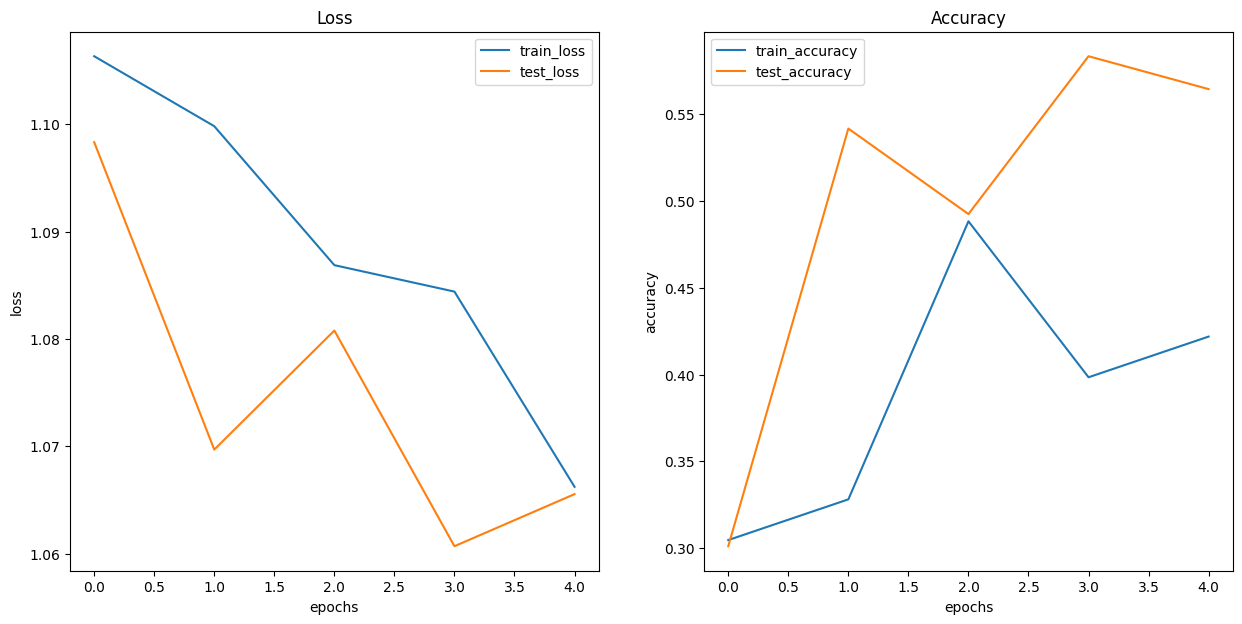

In [ ]:
plot_loss_curves(results=model_0_results)

In [ ]:
train_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])
test_transform_simple = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [ ]:
train_data_augmented = datasets.ImageFolder(root=train_dir,transform=train_transform_trivial)
test_data_simple = datasets.ImageFolder(root=test_dir,transform=test_transform_simple)

In [ ]:
BATCH_SIZE = 32
NUM_WORKERS=os.cpu_count()
torch.manual_seed(42)
train_dataloader_augmented = DataLoader(dataset=train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)
test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

In [ ]:
torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3,output_shape=len(train_data.classes),hidden_units=10).to(device)
print(model_1)

TinyVGG(
  (conv_block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)


In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
NUM_EPOCHS = 5
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.001)
start_time = timer()
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device=device)
end_time = timer()
print(f"total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.1049, train accuracy: 0.2500, test loss: 1.1019, test accuracy: 0.2604
train loss: 1.0807, train accuracy: 0.4258, test loss: 1.1261, test accuracy: 0.2604
train loss: 1.0712, train accuracy: 0.4258, test loss: 1.1593, test accuracy: 0.2604
train loss: 1.1254, train accuracy: 0.3047, test loss: 1.1581, test accuracy: 0.2604
train loss: 1.0858, train accuracy: 0.4258, test loss: 1.1551, test accuracy: 0.3333
total training time: 7.723 seconds


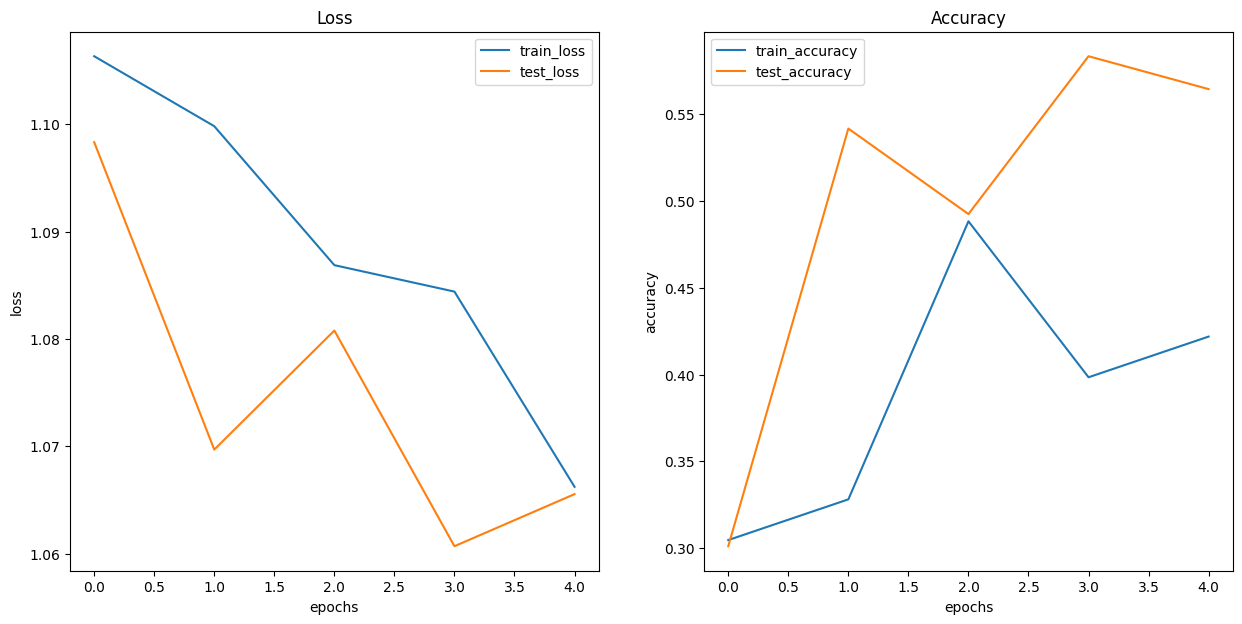

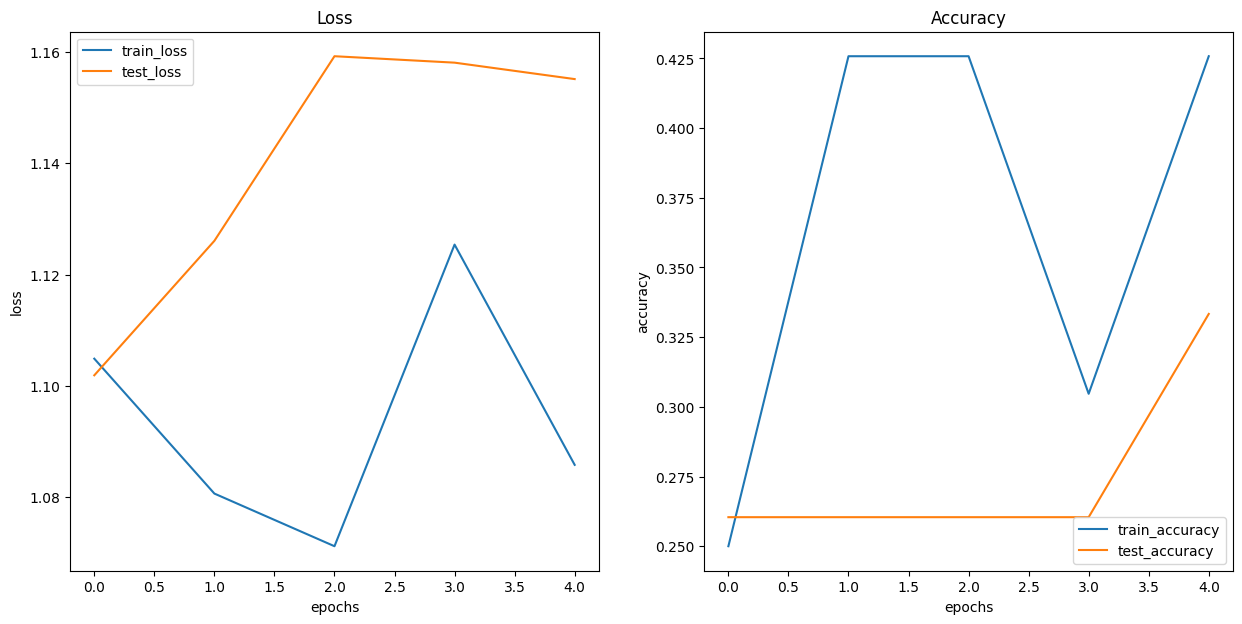

In [ ]:
plot_loss_curves(model_0_results)
plot_loss_curves(model_1_results)

In [ ]:
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.106319,0.304688,1.098323,0.301136
1,1.099804,0.328125,1.069696,0.541667
2,1.086868,0.488281,1.080781,0.492424
3,1.084405,0.398438,1.060700,0.583333
4,1.066232,0.421875,1.065549,0.564394


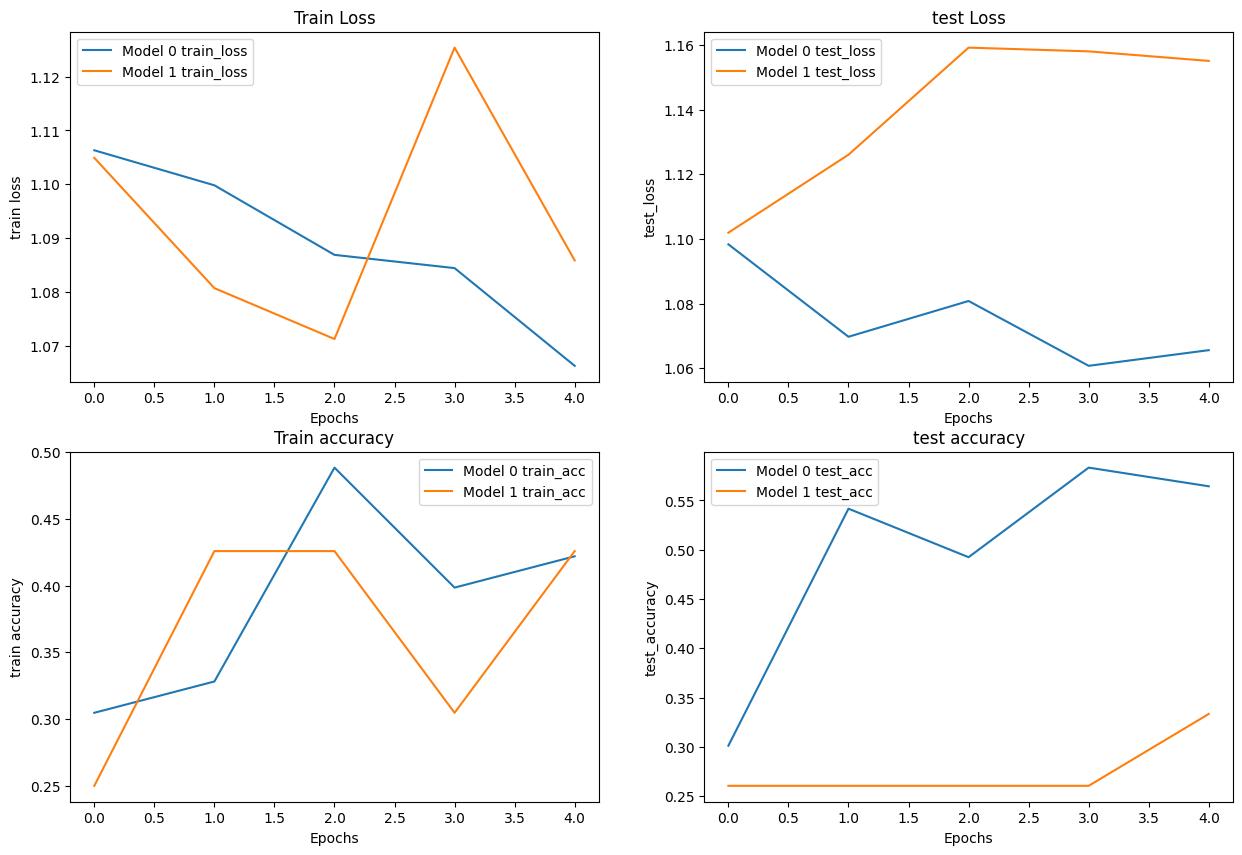

In [ ]:
plt.figure(figsize=(15,10))
epochs = range(len(model_0_df))
plt.subplot(2,2,1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0 train_loss")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1 train_loss")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.ylabel("train loss")
plt.legend()

plt.subplot(2,2,2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0 test_loss")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1 test_loss")
plt.title("test Loss")
plt.xlabel("Epochs")
plt.ylabel("test_loss")
plt.legend()

plt.subplot(2,2,3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0 train_acc")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1 train_acc")
plt.title("Train accuracy")
plt.xlabel("Epochs")
plt.ylabel("train accuracy")
plt.legend()

plt.subplot(2,2,4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0 test_acc")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1 test_acc")
plt.title("test accuracy")
plt.xlabel("Epochs")
plt.ylabel("test_accuracy")
plt.legend()

In [ ]:
custom_image_path = data_path / "04-pizza-dad.jpeg"
if not custom_image_path.is_file():
  with open(custom_image_path, "wb") as f:
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/images/04-pizza-dad.jpeg")
    print(f"downloading {custom_image_path}...")
    f.write(request.content)
else:
    print(f"{custom_image_path} already exists.")

downloading data/04-pizza-dad.jpeg...


In [ ]:
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))
print(f"custom image tensor {custom_image_uint8}")
print(f"custom image tensor shape {custom_image_uint8.shape}")
print(f"custom image tensor dtype {custom_image_uint8.dtype}")

custom image tensor tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)
custom image tensor shape torch.Size([3, 4032, 3024])
custom image 

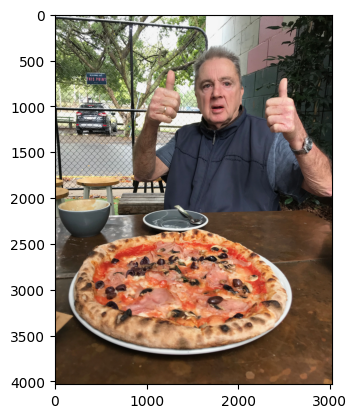

In [ ]:
plt.imshow(custom_image_uint8.permute(1,2,0))

In [ ]:
custom_image = (torchvision.io.read_image(str(custom_image_path))/255).unsqueeze(dim=0).type(torch.float32).to(device)
custom_image_transform = transforms.Compose([
    transforms.Resize(size=(64,64))
])
custom_image_transformed = custom_image_transform(custom_image)
print(custom_image.shape)
print(custom_image_transformed.shape)

torch.Size([1, 3, 4032, 3024])
torch.Size([1, 3, 64, 64])


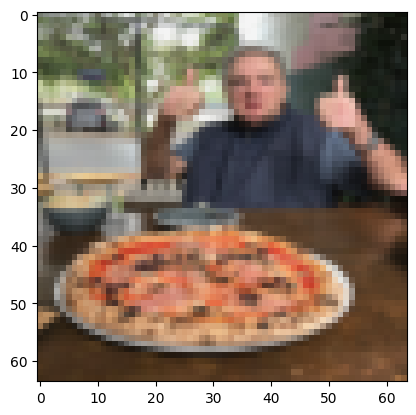

In [ ]:
plt.imshow(custom_image_transformed.squeeze().permute(1,2,0).cpu())

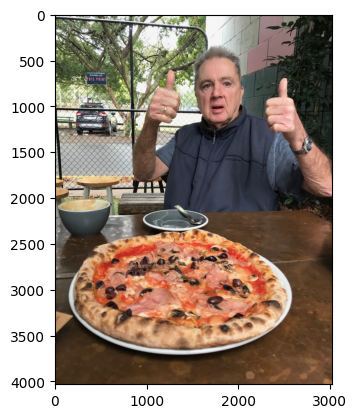

In [ ]:
plt.imshow(custom_image.squeeze().permute(1,2,0).cpu())

In [ ]:
model_1.eval()
with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed)
  print(custom_image_pred)

tensor([[ 0.0792,  0.0364, -0.2081]], device='cuda:0')


In [ ]:
custom_image_pred_probs = torch.softmax(custom_image_pred,dim=1)
print(custom_image_pred)

tensor([[ 0.0792,  0.0364, -0.2081]], device='cuda:0')


In [ ]:
custom_image_pred_labels = torch.argmax(custom_image_pred_probs, dim=1).cpu()
print(custom_image_pred_labels)
print(class_names[custom_image_pred_labels])

tensor([0])
pizza


In [ ]:
def pred_and_plot_image(image_path: Path|str,
                        model,
                        class_names:list = None,
                        transform=None,
                        resize=None,
                        device="cuda" if torch.cuda.is_available() else "cpu"
                        ):
  if(type(image_path)!=type("")):
    image_path = str(image_path)

  if(resize != None and type(resize)==type((64,64))):
    resize_for_custom_image = transforms.Compose([
        transforms.Resize(size=resize)
    ])

  transform_for_custom_image = transform

  custom_image = torchvision.io.read_image(image_path)
  custom_image = custom_image/255
  custom_image = custom_image.unsqueeze(dim=0)
  custom_image = custom_image.type(torch.float32)
  custom_image = custom_image.to(device)
  if(resize != None and type(resize)==type((64,64))):
    custom_image = resize_for_custom_image(custom_image)
  if(transform_for_custom_image!=None):
    custom_image = transform_for_custom_image(custom_image)
  #print(f"custom image shape: {custom_image.shape}")
  model.to(device)
  model.eval()
  with torch.inference_mode():
    custom_image_pred = model(custom_image)
  custom_image_probs = torch.softmax(custom_image_pred, dim=1)
  custom_image_pred_labels = torch.argmax(custom_image_probs, dim=1)
  custom_image_class = class_names[custom_image_pred_labels] if class_names != None else custom_image_pred_labels.cpu()
  plt.imshow(custom_image.squeeze().permute(1,2,0).cpu())
  plt.title(custom_image_class)
  plt.axis(False)


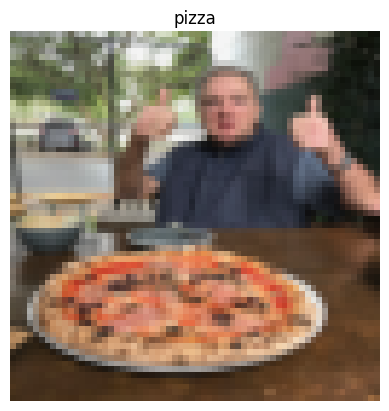

In [ ]:
pred_and_plot_image(image_path=custom_image_path,model=model_1,transform=custom_image_transform, class_names=class_names)